In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys 
sys.path.append("../..")

from utils_common import EvalData

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Extracting Test Data

The five (publically released) pre-trained models are evaluated on the respective datasets.

In [3]:
# labels = ["modelnet40_complete/813", 
#           "modelnet40_complete/851", 
#           "modelnet40_complete/8562", 
#           "modelnet40_complete/8581", 
#           "modelnet40_complete/8591",
#           "modelnet40_partial/913r"
#           "modelnet40_partial/921r", 
#           "modelnet40_partial/941r", 
#           "modelnet40_partial/951r", 
#           "modelnet40_partial/961r"
#          ]

labels = ["813 (airplane)", 
          "851 (car)", 
          "8562 (bottle)", 
          "8581 (chair)", 
          "8591 (sofa)",
          "913r (airplane)",
          "921r (car)", 
          "941r (bottle)", 
          "951r (chair)", 
          "961r (sofa)"
         ]

files = []
# model: modelnet40_complete/813
files.append("../equi-pose/runs/Dec08_12-39-14_spark-agent/eval_data.pkl")

# model: modelnet40_complete/851
files.append("../equi-pose/runs/Dec08_12-41-36_spark-agent/eval_data.pkl")

# model: modelnet40_complete/8562 
files.append("../equi-pose/runs/Dec08_12-42-43_spark-agent/eval_data.pkl")

# model: modelnet40_complete/8581 
files.append("../equi-pose/runs/Dec08_12-43-51_spark-agent/eval_data.pkl")

# model: modelnet40_complete/8591 
files.append("../equi-pose/runs/Dec08_12-45-01_spark-agent/eval_data.pkl")

# model: modelnet40_complete/913r 
files.append("../equi-pose/runs/Dec08_12-46-11_spark-agent/eval_data.pkl")

# model: modelnet40_complete/921r 
files.append("../equi-pose/runs/Dec08_12-50-34_spark-agent/eval_data.pkl")

# model: modelnet40_complete/941r 
files.append("../equi-pose/runs/Dec08_13-04-02_spark-agent/eval_data.pkl")

# model: modelnet40_complete/951r 
files.append("../equi-pose/runs/Dec08_13-17-43_spark-agent/eval_data.pkl")

# model: modelnet40_complete/961r
files.append("../equi-pose/runs/Dec08_13-31-15_spark-agent/eval_data.pkl")


In [4]:
data = dict()

for i, label in enumerate(labels):
    eval_data = EvalData() 
    
    print("label: ", label)
    print("loading file: ", files[i])
    eval_data.load(files[i])
    
    eval_data.complete_eval_data()
    
    data[label] = eval_data.data

label:  813 (airplane)
loading file:  ../equi-pose/runs/Dec08_12-39-14_spark-agent/eval_data.pkl
label:  851 (car)
loading file:  ../equi-pose/runs/Dec08_12-41-36_spark-agent/eval_data.pkl
label:  8562 (bottle)
loading file:  ../equi-pose/runs/Dec08_12-42-43_spark-agent/eval_data.pkl
label:  8581 (chair)
loading file:  ../equi-pose/runs/Dec08_12-43-51_spark-agent/eval_data.pkl
label:  8591 (sofa)
loading file:  ../equi-pose/runs/Dec08_12-45-01_spark-agent/eval_data.pkl
label:  913r (airplane)
loading file:  ../equi-pose/runs/Dec08_12-46-11_spark-agent/eval_data.pkl
label:  921r (car)
loading file:  ../equi-pose/runs/Dec08_12-50-34_spark-agent/eval_data.pkl
label:  941r (bottle)
loading file:  ../equi-pose/runs/Dec08_13-04-02_spark-agent/eval_data.pkl
label:  951r (chair)
loading file:  ../equi-pose/runs/Dec08_13-17-43_spark-agent/eval_data.pkl
label:  961r (sofa)
loading file:  ../equi-pose/runs/Dec08_13-31-15_spark-agent/eval_data.pkl


## ADD-S and ADD-S (AUC)

In [5]:
df = pd.DataFrame(data, index=["adds_th_score", "adds_auc"])
display(df)

,813 (airplane),851 (car),8562 (bottle),8581 (chair),8591 (sofa),913r (airplane),921r (car),941r (bottle),951r (chair),961r (sofa)
adds_th_score,0.210000,0.910000,0.910000,0.040000,0.210000,0.190000,0.190667,0.054167,0.662333,0.468833
adds_auc,0.328657,0.835738,0.815857,0.060116,0.328657,0.274384,0.178639,0.070292,0.626820,0.413050


## Distribution of Error Metrics

In [6]:
sns.set(style="darkgrid")
adds_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["adds"]}))
    adds_data[key] = df_


In [7]:
conca = pd.concat([adds_data[key].assign(dataset=key) for key in adds_data.keys()])

Text(0.5, 0, 'ADD-S')

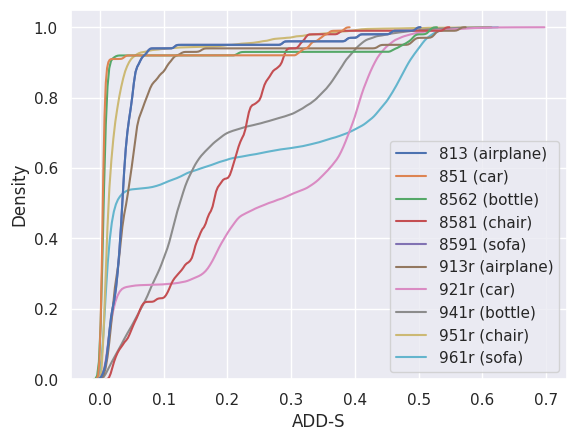

In [8]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('ADD-S')

In [9]:
sns.set(style="darkgrid")
rerr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["rerr"]}))
    rerr_data[key] = df_


In [10]:
conca = pd.concat([rerr_data[key].assign(dataset=key) for key in rerr_data.keys()])

Text(0.5, 0, 'Rotation Error (axis-angle, in rad)')

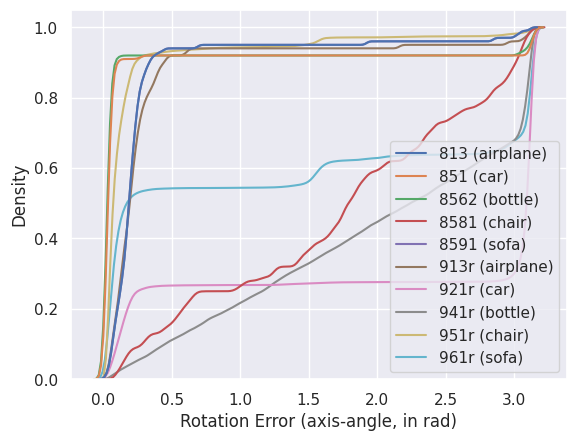

In [11]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Rotation Error (axis-angle, in rad)')

In [12]:
sns.set(style="darkgrid")
terr_data = dict()
for key in data.keys():
    df_ = pd.DataFrame(dict({key: data[key]["terr"]}))
    terr_data[key] = df_


ValueError: If using all scalar values, you must pass an index

In [13]:
conca = pd.concat([terr_data[key].assign(dataset=key) for key in terr_data.keys()])

ValueError: No objects to concatenate

Text(0.5, 0, 'Translation Error')

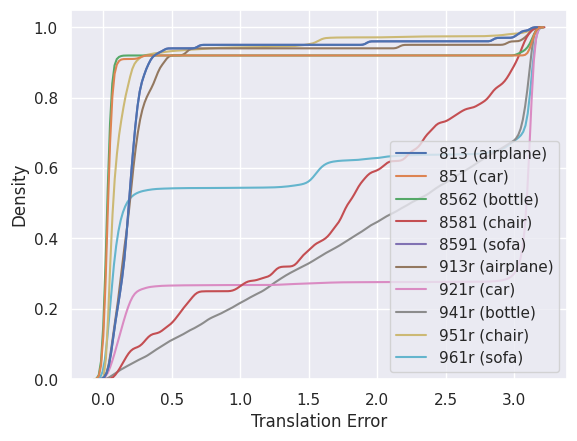

In [14]:
sns.kdeplot(conca, bw_adjust=0.1, cumulative=True, common_norm=False)
plt.xlabel('Translation Error')

## Conclusion

1. To be written.